# Recommendations for Airplane Startup Plan

In this notebook, we are going to explore the accident/incident of Aviation Data to analyze the risk of each plane.

In [2]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load Data
dtypes = {'column_name_6':'int64', 'column_name_7':'float64', 'column_name_8':'float64'}

aviation = pd.read_csv('Data/AviationData.csv', encoding='ISO-8859-1', dtype=dtypes, parse_dates=['Event.Date'], low_memory=False)
pd.options.mode.chained_assignment = None


In [4]:
# View DataFrame

aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

## Filtering the Data

In [5]:
# Making a copy of existing Dataframe to work on

aviation_cleaned = aviation.copy()

In [6]:
# Stack Overflow code to pull only the Year out of Event.Date

aviation_cleaned["Year"] = pd.DatetimeIndex(aviation_cleaned["Event.Date"]).year

In [7]:
# Removing all years prior to 2002 when the Aviation and Transportation Security Act went into effect

aviation_cleaned = aviation_cleaned[(aviation_cleaned["Year"] >= 2002) & (aviation_cleaned["Country"] == "United States")]
aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

## Data Cleaning

### Deleting Missing Values

In [8]:
# Filling Nulls in the Make column so we can manipulate it more easily

aviation_cleaned["Make"].fillna("other", inplace = True)

In [9]:
# Check that the Nulls are filled

aviation_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31865 entries, 51958 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                31865 non-null  object        
 1   Investigation.Type      31865 non-null  object        
 2   Accident.Number         31865 non-null  object        
 3   Event.Date              31865 non-null  datetime64[ns]
 4   Location                31858 non-null  object        
 5   Country                 31865 non-null  object        
 6   Latitude                31266 non-null  object        
 7   Longitude               31256 non-null  object        
 8   Airport.Code            21667 non-null  object        
 9   Airport.Name            21849 non-null  object        
 10  Injury.Severity         31757 non-null  object        
 11  Aircraft.damage         31001 non-null  object        
 12  Aircraft.Category       24374 non-null  ob

### Cleaning the 'Make' Column

We cleaned the 'Make' Column so that the top 4 manufacturers are easy to filter

In [10]:
# Changing all the Make column into lowercase strings for ease of manipulation and analysis

aviation_cleaned["Make"] = aviation_cleaned["Make"].str.lower()

# Eliminating periods from the column observations

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('.', '', regex=False)

# Cleaning Data

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corp', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech corporation', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft co', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker beech', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('hawker-beechcraft', 'beechcraft', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('beech aircraft corp', 'beechcraft', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-stearman', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing (stearman)', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing company, long beach div', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('the boeing company', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing-vertol', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing 777-306er', 'boeing', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('boeing commercial airplane gro', 'boeing', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industrie', 'airbus', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('airbus industries', 'airbus', regex=False)

aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier aerospace, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('learjet inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier, inc', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('bombardier learjet corp', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet', 'bombardier', regex=False)
aviation_cleaned['Make'] = aviation_cleaned['Make'].str.replace('gates learjet corporation', 'bombardier', regex=False)


In [11]:
aviation_cleaned['Make'].value_counts()

cessna                8391
piper                 4753
beechcraft            1771
bell                   794
boeing                 581
                      ... 
pfeifler                 1
donegan benton           1
murrin frederick l       1
michael burton           1
czech                    1
Name: Make, Length: 4648, dtype: int64

In [12]:
# Creating a new Dataframe contianing only the top four

top_four = aviation_cleaned.loc[(aviation_cleaned["Make"].isin(["boeing", "airbus", "bombardier", "beechcraft"]))]

In [13]:
# Filling null values with 0 in Total.Fatal.Injuries column 

top_four["Total.Fatal.Injuries"].fillna(0, inplace = True)

In [14]:
incident_counts = top_four["Make"].value_counts()
incident_counts

beechcraft    1771
boeing         581
airbus         173
bombardier     163
Name: Make, dtype: int64

## Visualizing the Data

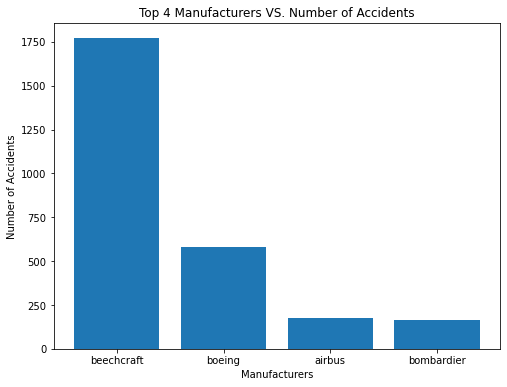

In [16]:
# Visualizing the Top 4 Manufacturers vs Number of Accident/Incidents

top_manufacturers = incident_counts.index
number_of_accidents = incident_counts.values

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(top_manufacturers, number_of_accidents)

ax.set_title('Top 4 Manufacturers VS. Number of Accidents')
ax.set_xlabel('Manufacturers')
ax.set_ylabel('Number of Accidents');